In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
df = pd.read_csv('laptop_data.csv',header=0)

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# DATA CLEANING

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA

<Axes: xlabel='Price', ylabel='Density'>

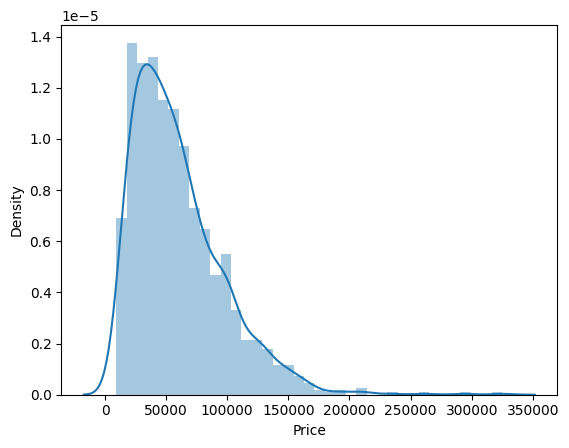

In [14]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

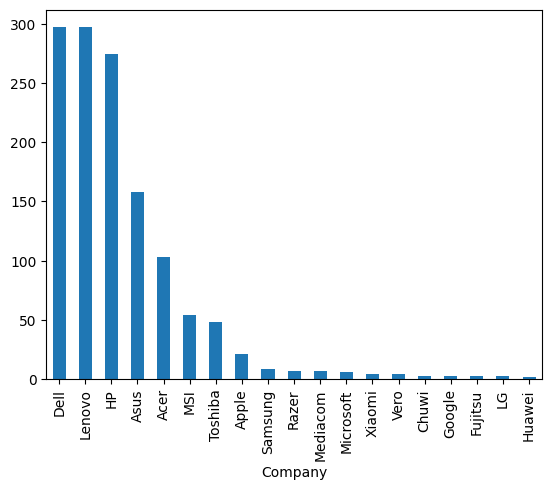

In [15]:
df['Company'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

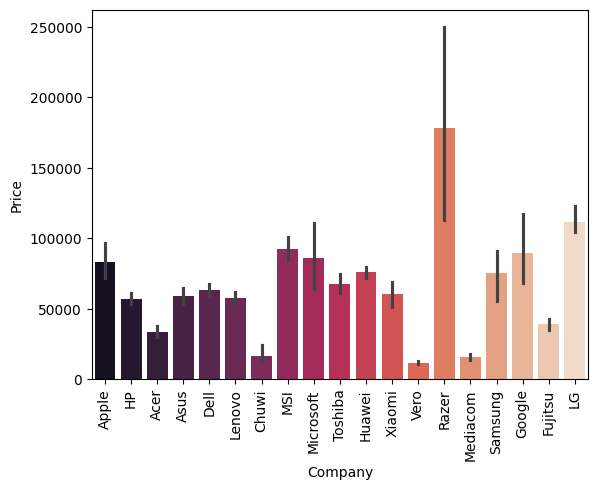

In [16]:
sns.barplot(x=df['Company'],y=df['Price'],palette='rocket')
plt.xticks(rotation='vertical')

<Axes: xlabel='TypeName'>

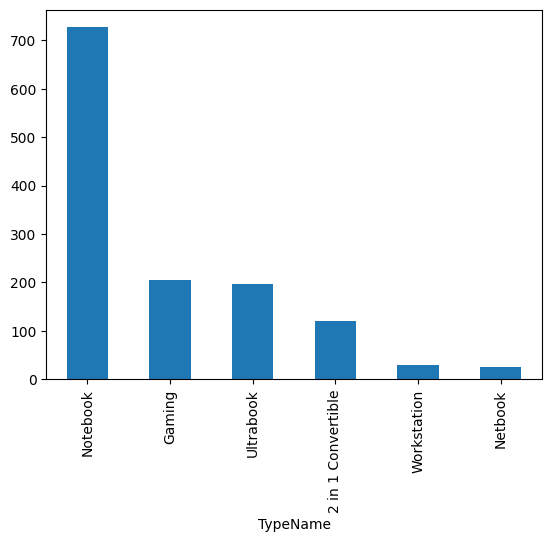

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

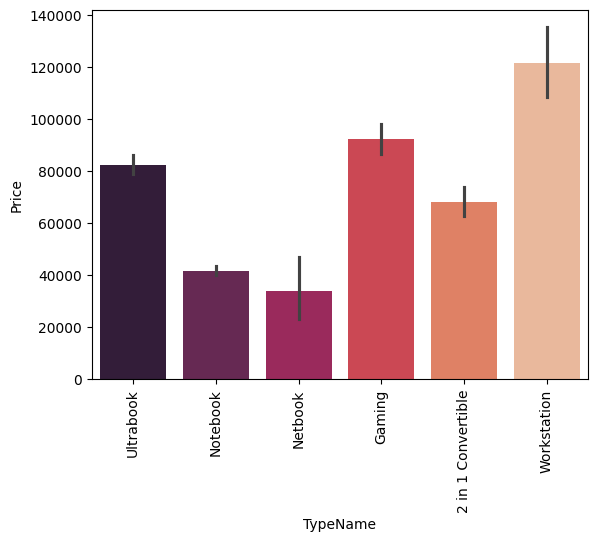

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'],palette='rocket')
plt.xticks(rotation='vertical')

<Axes: xlabel='Inches', ylabel='Density'>

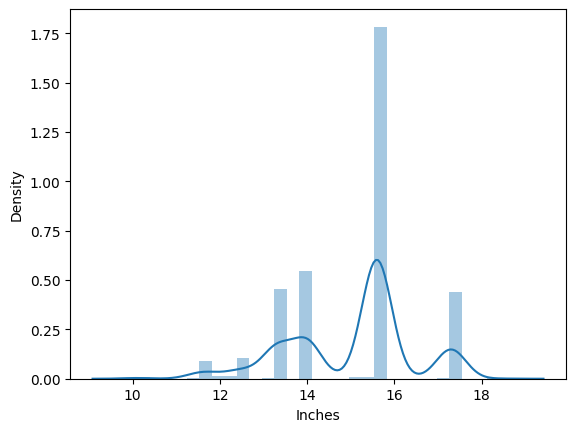

In [19]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

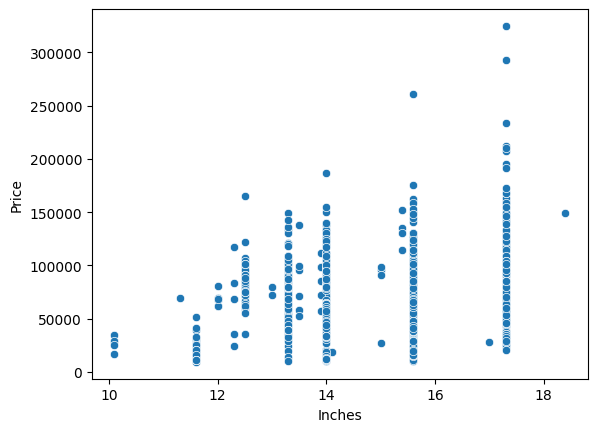

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [21]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [22]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


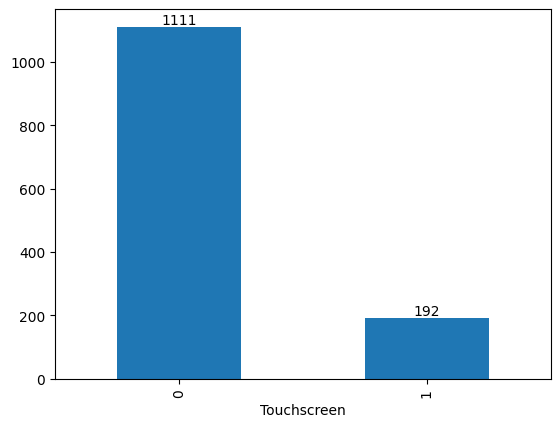

In [24]:
value_counts = df['Touchscreen'].value_counts()
ax = value_counts.plot(kind='bar')

for i, count in enumerate(value_counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

<Axes: xlabel='Touchscreen', ylabel='Price'>

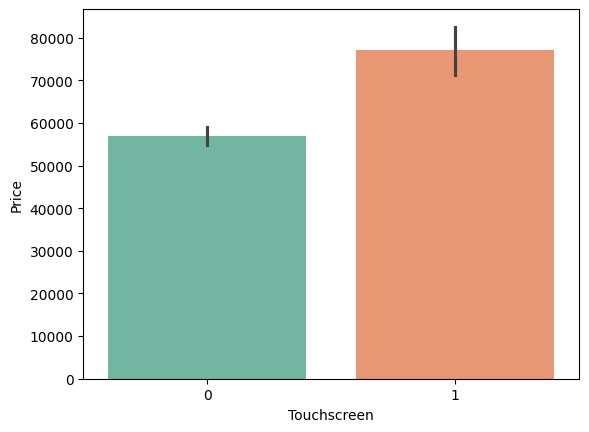

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='Set2')

In [26]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


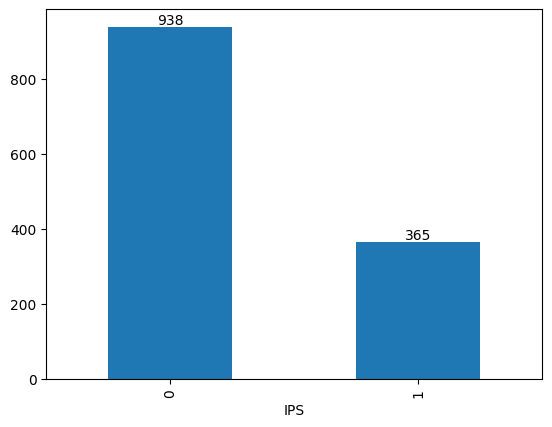

In [28]:
value_counts = df['IPS'].value_counts()
ax = value_counts.plot(kind='bar')

for i, count in enumerate(value_counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

<Axes: xlabel='IPS', ylabel='Price'>

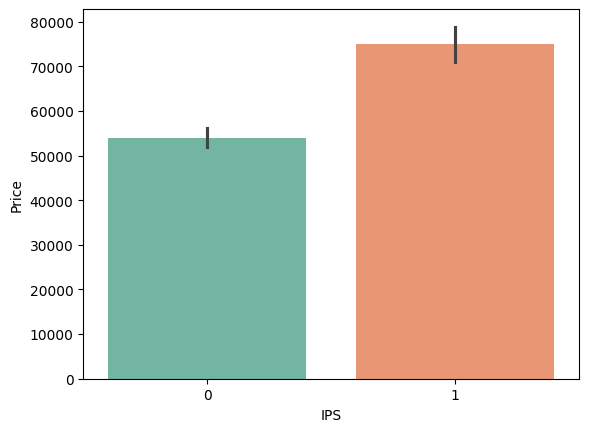

In [29]:
sns.barplot(x=df['IPS'],y=df['Price'],palette='Set2')

In [30]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [32]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [34]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [36]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')

In [37]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [38]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [39]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [40]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [41]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
def fetch_processor(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [43]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

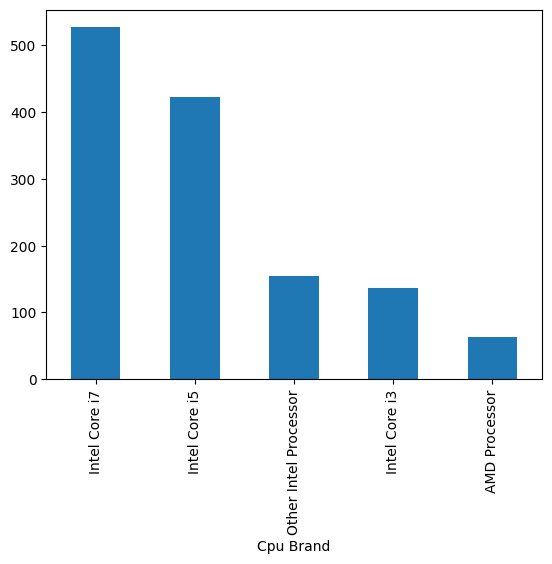

In [45]:
df['Cpu Brand'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

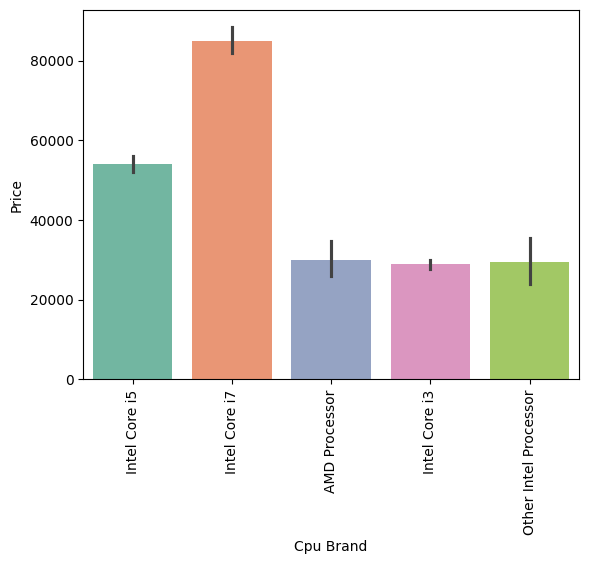

In [46]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')

In [47]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

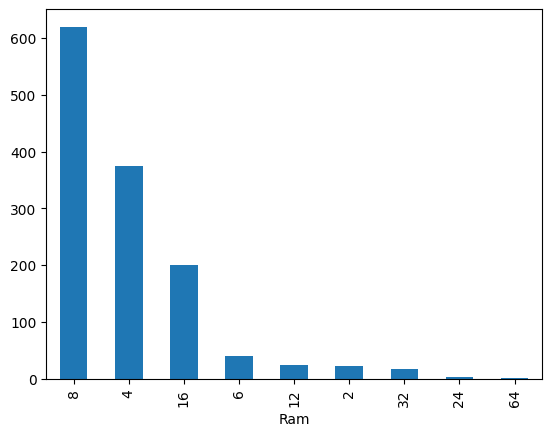

In [49]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

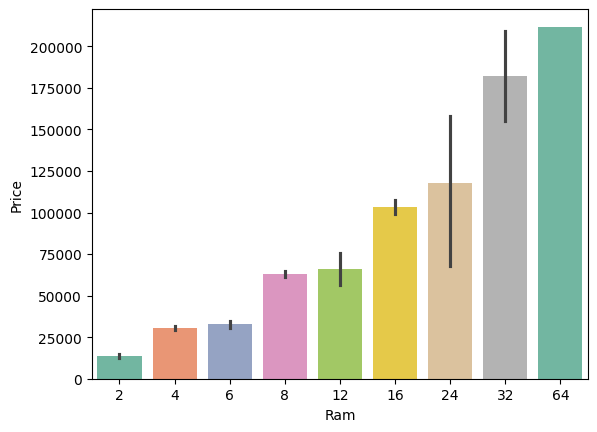

In [50]:
sns.barplot(x=df['Ram'],y=df['Price'],palette='Set2')

In [51]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [52]:
# the below code is implemented by parts seperately

# df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# df['Memory'] = df['Memory'].str.replace('GB', '')
# df['Memory'] = df['Memory'].str.replace('TB', '000')
# df['Memory'] = df['Memory'].str.replace('Flash Stroage', 'Flash_Storage')

# # Split the 'Memory' column into two parts
# new = df['Memory'].str.split("+", n=1, expand=True)

# df['first'] = new[0]
# df['first'] = df['first'].str.strip()

# df['second'] = new[1]
# df['second'] = df['second'].str.strip()

# # Create Layer columns based on the presence of keywords
# df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
# df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
# df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
# df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash_Storage" in x else 0)

# df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# df['second'].fillna("0", inplace=True)

# df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
# df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
# df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
# df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash_Storage" in x else 0)

# df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# # Convert the cleaned values to integers
# df['first'] = df['first'].astype(int)
# df['second'] = df['second'].astype(int)

# # Calculate the total for each storage type
# df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
# df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
# df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
# df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# # Drop the intermediate columns
# df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
#                  'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
df['Memory'] = df['Memory'].str.replace('Flash Stroage', 'Flash_Storage')

In [54]:
new = df['Memory'].str.split("+", n=1, expand=True)
new.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [55]:
df['first'] = new[0]
df['first'] = df['first'].str.strip()

In [56]:
df['first']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [57]:
df['second'] = new[1]
df['second'] = df['second'].str.strip()
df['second']

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: second, Length: 1303, dtype: object

In [58]:
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash_Storage" in x else 0)

In [59]:
df['first'] = df['first'].str.replace(r'\D', '', regex=True)
df['second'].fillna("0", inplace=True)
print(df['first'])
print(df['second'])

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: object


In [60]:
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash_Storage" in x else 0)

In [61]:
df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df['second']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: object

In [62]:
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

In [63]:
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

In [64]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                  'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

In [65]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [66]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [67]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [68]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [70]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [71]:
df = df[df['Gpu Brand'] != 'ARM']

In [72]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [73]:
df.drop(columns=['Gpu'],inplace=True)

<Axes: xlabel='Gpu Brand', ylabel='Price'>

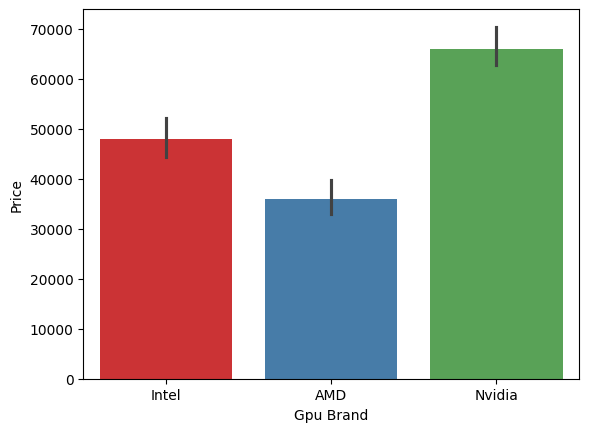

In [74]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'],palette='Set1',estimator=np.median)

In [75]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

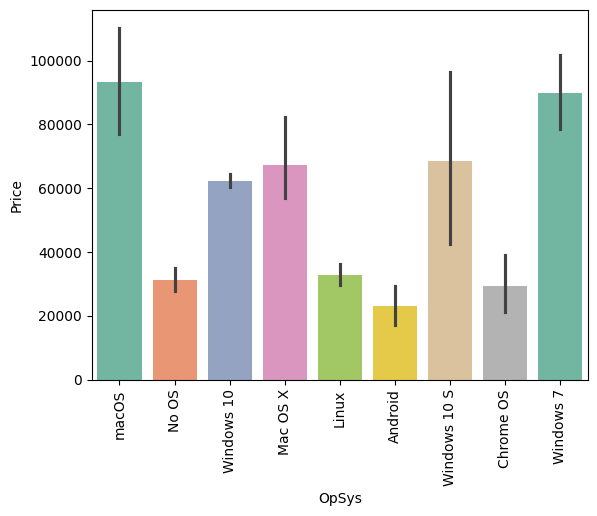

In [76]:
sns.barplot(x=df['OpSys'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')

In [77]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'MAC'
    else:
        return 'Others/No OS/Linux'

In [78]:
df['os'] = df['OpSys'].apply(cat_os)

In [79]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,MAC
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,MAC
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,MAC
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,MAC


In [80]:
df.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='os', ylabel='Price'>

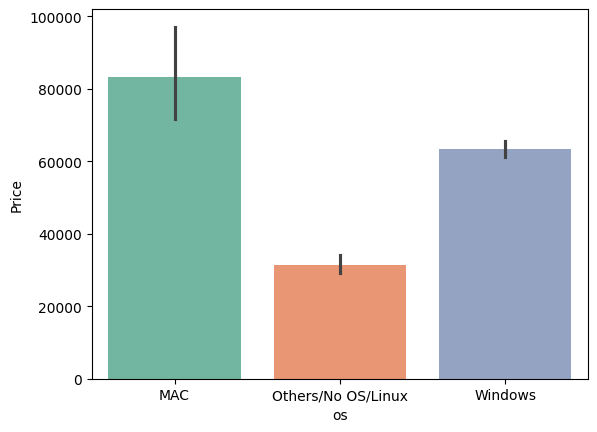

In [81]:
sns.barplot(x=df['os'],y=df['Price'],palette='Set2')

<Axes: xlabel='Weight', ylabel='Density'>

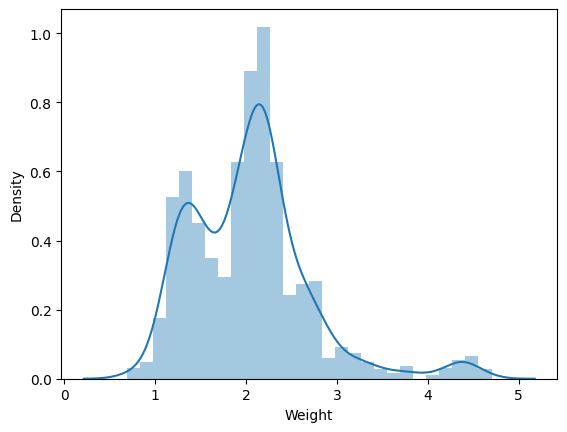

In [82]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

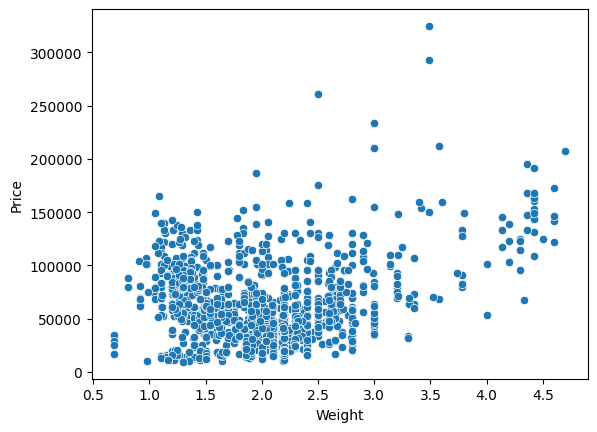

In [83]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

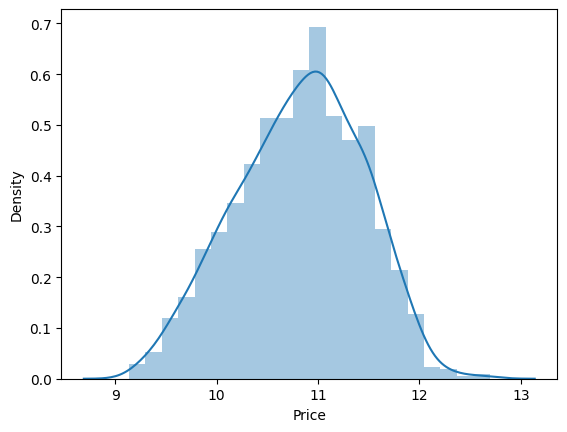

In [84]:
sns.distplot(np.log(df['Price']))

In [85]:
X = df.drop(columns=['Price'])
Y = df['Price']

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [87]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

lr = LinearRegression()

pipe = Pipeline([
    ('transformer',transformer),
    ('lr',lr)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('lr', LinearRegression())])

In [88]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 41047.18314891,  73250.54702631, 102833.48183151,  76337.60881813,
        32834.11486389,  67124.751503  , 179157.55249432,  72160.80526709,
        68250.23563368,  25671.65717155,  14985.23768561,  90648.21058723,
        67632.82019524,  66453.37397963,  99563.92834151,  43460.88522211,
        28379.78654501,  17709.0612293 ,  72258.12285995,  40342.14846337,
        31438.17596309,  62386.1046883 ,  31822.867008  ,  45548.68011694,
        40760.21841653,  68787.24590398, 102839.85905537,  41217.58596566,
        25054.16102846, 121118.66191625,  32834.11486389, 236391.4052086 ,
        31262.92350368,  73834.8761977 ,  67431.61459774,  17544.6019059 ,
        80668.10155179,  63037.57163965,  89526.75335687,  26547.01273197,
        68413.20521757,  40851.45057183,  30262.55039223,  22487.53920169,
       150552.68341726,  73958.05857398,  99825.66235982,  27028.77093219,
        31371.30683079,  89710.09153188,  60813.99934543,  39704.04391239,
       162296.44271373, 1

In [89]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.7522865952888615
MAE :  13283.179079362766


# RANDOM FOREST REGRESSOR

In [90]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rfr = RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)

pipe = Pipeline([
    ('transformer',transformer),
    ('rfr',rfr)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('rfr',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [91]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 37865.31475293,  70036.87867685,  92942.45225172,  92848.52505216,
        24522.82885869,  80769.37839725, 129375.1176    ,  81694.33874831,
        75737.78038764,  25357.9691886 ,  13579.7365146 ,  90679.54151388,
        61571.24097541,  60546.57513678,  90233.19165943,  36988.47631829,
        28629.54610941,  28936.97472389,  60233.5818576 ,  45677.87492   ,
        40225.531536  ,  54211.87796839,  30182.68889764,  41523.768     ,
        36747.221328  ,  55293.549768  , 101203.404624  ,  50483.9288256 ,
        21844.270752  , 134571.528432  ,  24522.82885869, 198994.69944   ,
        26399.8160693 ,  76638.38991773,  58899.0404016 ,  20480.416416  ,
        80815.02182629,  68246.06395695, 103032.801396  ,  19364.42031286,
        61318.3302085 ,  35217.74573143,  27057.17594182,  28932.968736  ,
       138731.84419108,  59779.8888936 ,  92071.29573446,  20878.60611262,
        35433.501696  ,  88612.80252578,  53952.932616  ,  47171.321904  ,
       163543.382688  , 1

In [92]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.7944545772200744
MAE :  10613.549769001296


# EXTRA TREE REGRESSOR

In [93]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

etr = ExtraTreesRegressor(n_estimators=100,
                           bootstrap=True,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)

pipe = Pipeline([
    ('transformer',transformer),
    ('etr',etr)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('etr',
                 ExtraTreesRegressor(bootstrap=True, max_depth=15,
                                     max_features=0.75, max_samples=0.5,
                                     random_state=3))])

In [94]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 38512.4784224 ,  70266.04807554,  91335.35059829,  89371.25103074,
        25007.60701114,  72275.438436  , 136055.739624  ,  80152.09191818,
        76261.8618    ,  24298.88645489,  13698.89628   ,  85793.31944686,
        61780.94571748,  61028.25294148, 101163.391344  ,  36249.2213376 ,
        28129.80204   ,  29701.77677743,  64838.81184   ,  41017.506768  ,
        39945.16226   ,  54439.91940299,  31514.34266489,  36765.280584  ,
        39994.329044  ,  56737.051488  , 101595.671298  ,  46400.0649552 ,
        24523.864032  , 140152.32072   ,  25007.60701114, 198460.503504  ,
        26681.94803018,  69919.3828944 ,  76241.03464637,  20529.107232  ,
        85666.65931095,  61849.17033657, 103565.51029527,  19239.68333788,
        62425.5090252 ,  32764.5915    ,  27013.784508  ,  27817.120368  ,
       133863.86614283,  69999.043332  ,  87032.13794426,  21269.11638945,
        35779.09185687,  89270.44994774,  56201.92043978,  31924.82328343,
       163865.023392  , 1

In [95]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.7848694443684622
MAE :  10714.468688497256


# GRADIENT BOOST

In [113]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

gba = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('transformer',transformer),
    ('gba',gba)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('gba', GradientBoostingRegressor(n_estimators=500))])

In [114]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 38684.98084668,  70283.69195565,  93439.04342525,  81535.51421823,
        27929.55310947,  80236.21609043, 117984.44944712,  84164.53328424,
        71218.54424289,  24658.80187066,  13413.48956966,  94997.50262945,
        59285.14772542,  61098.88608034,  86972.47072945,  31912.62276598,
        24453.15888626,  25372.34232176,  65195.09358843,  40286.41878091,
        37531.06481327,  53846.02986843,  36601.90646163,  41021.75637814,
        33442.47985346,  51470.59909014,  91305.10002447,  45465.81626336,
        14382.1353534 , 122361.77131528,  27929.55310947, 291234.63728434,
        24641.21334395,  70672.20779426,  55767.28039583,  17853.75820904,
        77002.54301595,  69138.10346233, 112838.99279523,  19618.37435114,
        60570.2894147 ,  31077.85507698,  21840.87415127,  32907.7493943 ,
       176072.22162199,  69279.115208  ,  91715.13249299,  24452.84637096,
        34231.41121759,  97128.81243369,  57247.08086224,  35757.50313368,
       166855.86164967, 1

In [115]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.8254653815858379
MAE :  10339.38802851639


# XGBOOST

In [99]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

xg = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('transformer',transformer),
    ('xg',xg)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('xg',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=Fa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=45, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [100]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 38814.32  ,  70561.2   ,  97634.23  ,  97535.16  ,  24066.576 ,
        75873.15  , 125481.81  ,  83516.12  ,  63880.105 ,  26284.096 ,
        16505.7   , 108902.766 ,  59553.586 ,  59345.734 ,  90048.484 ,
        24377.883 ,  26358.81  ,  28363.71  ,  64500.715 ,  40597.67  ,
        41418.24  ,  55828.49  ,  35042.39  ,  48581.37  ,  40230.    ,
        40881.58  , 109952.08  ,  50318.957 ,  15377.405 , 124477.57  ,
        24066.576 , 284005.38  ,  23810.54  ,  66400.984 ,  61420.18  ,
        17868.795 ,  71712.414 ,  66095.266 , 108930.125 ,  19299.04  ,
        64183.27  ,  29797.164 ,  25124.074 ,  29016.607 , 180235.89  ,
        61936.152 ,  85744.08  ,  22432.832 ,  34089.01  ,  92104.375 ,
        54640.84  ,  69863.94  , 175748.03  , 104834.07  ,  16047.602 ,
        87583.64  ,  59899.734 ,  48006.79  ,  59160.938 ,  46844.395 ,
        20106.178 ,  56277.57  ,  61502.895 ,  40958.695 , 106129.49  ,
        48764.766 ,  39772.496 ,  76818.84  ,   3771.943 ,  2570

In [101]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.8387709872708677
MAE :  9842.784037606261


# DECISION TREE regressor

In [102]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

dt = DecisionTreeRegressor(max_depth=15)

pipe = Pipeline([
    ('transformer',transformer),
    ('dt',dt)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('dt', DecisionTreeRegressor(max_depth=15))])

In [103]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 44542.08      ,  71357.1048    ,  96916.32      , 108556.4016    ,
        26211.52731429,  81893.18674286, 133146.72      ,  81893.18674286,
        45128.16      ,  14811.3072    ,  12201.12      ,  75568.8       ,
        61220.12465455,  61220.12465455, 101178.72      ,  33513.12      ,
        28422.0162    ,  28422.0162    ,  58554.72      ,  30636.        ,
        38889.072     ,  58217.28      ,  35124.3072    ,  48484.8       ,
        28768.536     ,  53226.72      , 101178.72      ,  67612.32      ,
        19980.        , 149130.72      ,  26211.52731429, 292986.72      ,
        26211.52731429,  66422.3556    ,  47099.52      ,  19441.872     ,
        74005.92      ,  66422.3556    ,  95850.72      ,  19660.32      ,
        66422.3556    ,  31914.72      ,  30316.32      ,  27899.0064    ,
       138474.72      ,  48964.32      , 123529.68      ,  25059.7152    ,
        32820.48      ,  90111.52376471,  58554.72      ,  27652.32      ,
       167691.8736    , 1

In [104]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.783354085881545
MAE :  11113.372567089731


# VOTING REGRESSOR

In [106]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,max_depth=5,learning_rate=0.3)
et = ExtraTreesRegressor(n_estimators=100,bootstrap=True,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

vr = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('transformer',transformer),
    ('vr',vr)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('vr',
                 VotingRegressor(estimators=[('rf',
                                              RandomForestRegressor(max_depth=15,
                                                                    max_features=0.75,
                                                                    max_samples=0.5,
                                                                    random_state=3)),
                                             ('gbdt',
                                              GradientBoostingRegressor(max_features=0.5)),
                                             ('xgb',
                                              XGBR...
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=5,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=25,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...)),
                                             ('et',
                                              ExtraTreesRegressor(bootstrap=True,
                                                                  max_depth=15,
                                                                  max_features=0.75,
                                                                  max_samples=0.5,
                                                                  random_state=3))],
                                 weights=[5, 1, 1, 1]))])

In [107]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 38954.07609585,  69419.94473921,  92985.15541678,  90923.22037297,
        24727.56417222,  78205.95719046, 132306.50853597,  80058.08530045,
        74606.20910998,  25298.72019728,  14055.93443658,  90659.86455655,
        61457.54199591,  60723.03924977,  91290.86377129,  36756.2323539 ,
        27901.44678352,  28146.3108361 ,  60259.26418096,  43186.30103261,
        38920.17764078,  53965.98090969,  29714.87418026,  41116.97319936,
        37579.87752285,  54171.28018364, 100389.24905588,  48546.18848488,
        21274.86294192, 134732.87298322,  24727.56417222, 217240.83094671,
        26561.73271938,  72562.97370521,  62395.62764708,  20607.93171734,
        79432.02400694,  65369.86670833, 105306.15308846,  19241.78602713,
        60686.41615817,  34790.75704313,  26564.58594982,  28533.67774894,
       143829.50217135,  62727.84215969,  91308.97580112,  21903.78077571,
        35576.44045333,  89951.87384223,  54391.67970338,  46376.74441   ,
       163284.96694339, 1

In [108]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.8094755281064738
MAE :  10482.599469236213


# STACKING REGRESSOR

In [109]:
transformer = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

estimators = [
    ('rf' , RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt' , GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb' , XGBRegressor(n_estimators=25,max_depth=5,learning_rate=0.3))
]

sr = StackingRegressor(estimators=estimators,final_estimator=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))

pipe = Pipeline([
    ('transformer',transformer),
    ('sr',sr)
])

pipe.fit(X_train,Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('sr',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(max_depth=15,
                                                                      max_features=0.75,
                                                                      max_samples=0.5,
                                                                      random_state=3)),
                                               ('gbdt',
                                                GradientBoostingRegressor(max_features=0.5)),
                                               ('xgb',
                                                XG...
                                                                gamma=None,
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.5,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=5,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=45,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                random_state=None, ...)))])

In [110]:
Y_pred = pipe.predict(X_test)
Y_pred

array([ 40160.457 ,  74198.09  ,  93316.27  ,  96170.89  ,  26398.305 ,
        69462.695 , 130640.45  ,  74502.88  ,  72295.61  ,  29525.912 ,
        13143.331 , 112202.195 ,  59299.754 ,  59299.754 ,  76410.56  ,
        34241.31  ,  27285.043 ,  25569.945 ,  55699.992 ,  50842.87  ,
        32699.707 ,  52706.055 ,  30768.283 ,  43006.695 ,  35522.1   ,
        60083.383 ,  92883.75  ,  45081.24  ,  17781.002 , 160672.9   ,
        26398.305 , 126833.945 ,  25679.219 ,  65873.9   ,  56090.285 ,
        19865.777 ,  61991.89  ,  60804.83  , 132854.33  ,  18984.236 ,
        59185.344 ,  35950.21  ,  26398.305 ,  27285.043 , 236629.47  ,
        62272.094 , 101578.75  ,  19865.777 ,  30917.078 , 107671.01  ,
        47659.477 ,  87107.86  , 167843.5   , 129215.52  ,  18528.566 ,
        97583.05  ,  59185.344 ,  53481.152 ,  62525.41  ,  49404.07  ,
        22759.395 ,  60584.65  ,  63369.91  ,  33278.934 , 108387.62  ,
        40191.477 ,  51954.402 , 109874.305 ,  12753.734 ,  2526

In [111]:
print('R2 score : ',r2_score(Y_test,Y_pred))
print('MAE : ',mean_absolute_error(Y_test,Y_pred))

R2 score :  0.6845434416351621
MAE :  11997.225079777298


In [116]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))